## Collatz beta notebook

In [349]:
"""
This notebook analyses the betas of collatz sequences and their relationship
to other components. The beta  of an odd collatz number is defined by the 
following equation: beta = 1 + 1/k*x where x is the odd number. 
"""

# Fix possible import problems
import sys
sys.path.append("..")

# Imports
from fractions import Fraction
import random as rnd
import matplotlib.pyplot as plt
from math import log2
import pandas as pd
from collatz import commons as com
from collatz import generator as gen


# Configuration
k = 3
max_value = 101
max_iterations = 300
start_value = rnd.randint(1, max_value)

if start_value % 2 == 0:
    start_value = start_value + 1

# start_value = 1

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', 10000)
pd.set_option('display.expand_frame_repr', False)

# Create a collatz sequence and analyse it
analysis_frame = gen.generate_odd_collatz_sequence(
    start_value=start_value, k=k, max_iterations=max_iterations)

# Drop last row if sequences has ended with 1
if len(analysis_frame) > 1:
    analysis_frame = analysis_frame[:-1]

# Derive additional fields
analysis_frame["n"] = analysis_frame.index + 1
analysis_frame["v1"] = start_value

# Calculate alpha
analysis_frame["alpha"] = analysis_frame["next_collatz"].apply(com.trailing_zeros)
analysis_frame["alpha"] = analysis_frame["alpha"].astype("int64")
analysis_frame["alpha_sum"] = analysis_frame["alpha"].cumsum()
analysis_frame["alpha_max"] = analysis_frame["n"] * log2(k) + log2(start_value)
analysis_frame["alpha_max"] = analysis_frame["alpha_max"].astype('int64') + 1

# Calculate beta
analysis_frame["beta_i"] = 1 + 1/(k*analysis_frame["collatz"])
analysis_frame["beta"] = analysis_frame["beta_i"].cumprod()
analysis_frame["beta_log"] = analysis_frame["beta"].apply(log2)
analysis_frame["beta_log_max"] = analysis_frame["alpha_max"] - \
                             analysis_frame["n"] * log2(k) - log2(start_value)

analysis_frame["beta_log_pred"] = (analysis_frame["n"] * log2(k)).astype('int64') + 1 - \
                                   analysis_frame["n"] * log2(k)

analysis_frame["beta_max"] = 2**analysis_frame["beta_log_max"]
analysis_frame["beta_pred"] = 2**analysis_frame["beta_log_pred"]

analysis_frame["beta_frac"] = analysis_frame["beta"].apply(
    Fraction.from_float).apply(Fraction.limit_denominator)

analysis_frame["beta_max_frac"] = analysis_frame["beta_max"].apply(
    Fraction.from_float).apply(Fraction.limit_denominator)

analysis_frame["beta_pred_frac"] = analysis_frame["beta_pred"].apply(
    Fraction.from_float).apply(Fraction.limit_denominator)

# Print results
print_frame = analysis_frame[[
    "n", "collatz","next_odd",
    "beta", "beta_max", "beta_pred", 
    "beta_frac", "beta_max_frac", "beta_pred_frac"
]]

print_frame.columns = ["n","vi", "vi_1",
                       "b", "b_max", "b_pred", 
                       "b_frac", "b_max_frac", "b_pred_frac"]

final_beta = analysis_frame["beta"][len(analysis_frame)-1]

print("v1:", start_value, " K:", k, 
      " beta:", final_beta, 
      "\n")

print(print_frame.to_string(index=False), "\n")

v1: 11  K: 3  beta: 1.1492704826038156 

 n  vi  vi_1         b     b_max    b_pred    b_frac b_max_frac b_pred_frac
 1  11    17  1.030303  1.939394  1.333333     34/33      64/33         4/3
 2  17    13  1.050505  1.292929  1.777778    104/99     128/99        16/9
 3  13     5  1.077441  1.723906  1.185185   320/297    512/297       32/27
 4   5     1  1.149270  1.149270  1.580247  1024/891   1024/891      128/81 



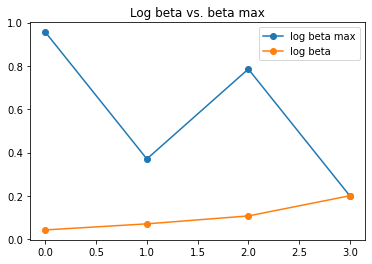

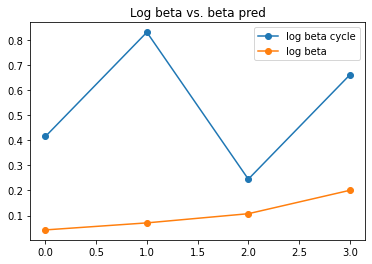

In [350]:
# Plot results
plt.figure()
plt.title("Log beta vs. beta max")
plt.plot(analysis_frame["beta_log_max"], "-o", label="log beta max")
plt.plot(analysis_frame["beta_log"], "-o", label='log beta')
plt.legend()

plt.figure()
plt.title("Log beta vs. beta pred")
plt.plot(analysis_frame["beta_log_pred"], "-o", label="log beta cycle")
plt.plot(analysis_frame["beta_log"], "-o", label='log beta')
plt.legend()
plt.show()